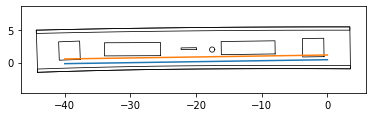

In [1]:
from ipynb.fs.full.whole_df import get_uppers, get_downers, get_whole_df, get_average_person_number, get_all_distances
import os
import numpy as np
import itertools
import pandas as pd
import statistics
import math
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
columns = ["Date", "d >= 1.5 Meter", "d < 1.5 Meter"]
distance_df = pd.DataFrame(columns = columns)

In [3]:
for filename in os.listdir(r"C:\Users\robin\Documents\Bachelorarbeit\Wartetrauben Analyse und Auswertung\Whole Dfs"):
    if "geo" not in filename:
#         df = get_whole_df(filename, 5, 5)
        df = pd.read_csv("Whole Dfs/" + filename, index_col=0)
        borderDistance = get_all_distances(df, inBorder = False)
        min_dist = len([i for i in borderDistance if i >= 1.5])
        distance_df = distance_df.append({"Date": str(filename[5:7]) + "." + str(filename[7:9]), "d >= 1.5 Meter": min_dist / len(borderDistance), 
                        "d < 1.5 Meter": 1 - min_dist}, ignore_index = True)

In [4]:
distance_df.index = distance_df["Date"]
distance_df = distance_df.drop("Date", axis = 1)

In [5]:
distance_df["d < 1.5 Meter"] = 1 - distance_df["d >= 1.5 Meter"]
distance_df.index = distance_df.index + ".2020"
distance_df

,d >= 1.5 Meter,d < 1.5 Meter
Date,,
02.05.2020,0.690955,0.309045
02.12.2020,0.676681,0.323319
02.19.2020,0.666065,0.333935
02.26.2020,0.644746,0.355254
03.04.2020,0.653822,0.346178
03.11.2020,0.676987,0.323013
03.18.2020,0.739850,0.260150
03.25.2020,0.749343,0.250657
04.01.2020,0.793617,0.206383


In [6]:
for date in distance_df.columns:
    distance_df[date] = distance_df[date] * 100

In [7]:
import matplotlib as mlp
plt.rcParams["font.family"] = "Microsoft Yi Baiti"
mlp.rc('font',family="Microsoft Yi Baiti")

In [8]:
keep_distance_two_rolling = pd.Series(distance_df["d >= 1.5 Meter"]).rolling(2).mean()
keepnot_distance_two_rolling = pd.Series(distance_df["d < 1.5 Meter"]).rolling(2).mean()

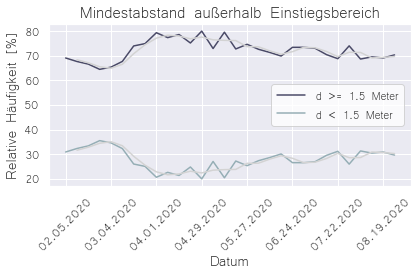

In [9]:
sb.set()
sb.lineplot(data = distance_df, palette = "bone", sort = False, dashes = False)
plt.xticks(distance_df.index, fontsize = 15, fontname = "Microsoft Yi Baiti", rotation = 45)
plt.xlabel("Datum", fontsize = 18, fontname = "Microsoft Yi Baiti")
plt.ylabel("Relative Häufigkeit [%]", fontsize = 18, fontname = "Microsoft Yi Baiti")
plt.yticks(fontsize = 15, fontname = "Microsoft Yi Baiti")
plt.locator_params(axis="x", nbins=8)
plt.title("Mindestabstand außerhalb Einstiegsbereich", fontsize = 20,fontname="Microsoft Yi Baiti")
sb.lineplot(distance_df.index, keep_distance_two_rolling, color = "lightgrey")
sb.lineplot(distance_df.index, keepnot_distance_two_rolling, color = "lightgrey")
plt.ylabel("Relative Häufigkeit [%]", fontsize = 18, fontname = "Microsoft Yi Baiti")
plt.xlabel("Datum", fontsize = 18, fontname = "Microsoft Yi Baiti")

plt.legend(facecolor = "white", prop={'family':"Microsoft Yi Baiti", 'size':14})
plt.tight_layout()
plt.savefig(r"Mindestabstand\Mindestabstand außerhalb Einstiegsbereich", dpi = 200)

In [10]:
df

,id,frame_x,x/m,y/m_x,GroupID,doorPosition,Gleis,doorPositionY,leftBorder,rightBorder,upperBorder,Einstiegsbeginn,inBorder,EinstiegsbeginnToleranz,numberInArea,numberAll,bottomBorder
0,244563,4005,-21.4992,-0.6885,431111,-22.97542,unten,-1.810631,-25.47542,-20.47542,0.806369,4010,True,4005,4,5,NaN
1,244581,4005,-24.0200,-0.7335,431111,-22.97542,unten,-1.810631,-25.47542,-20.47542,0.806369,4010,True,4005,4,5,NaN
2,244590,4005,-24.5871,-0.4637,431111,-22.97542,unten,-1.810631,-25.47542,-20.47542,0.806369,4010,True,4005,4,5,NaN
3,244636,4005,-25.3925,-0.3756,431111,-22.97542,unten,-1.810631,-25.47542,-20.47542,0.806369,4010,True,4005,4,5,NaN
4,244794,4005,-25.9003,-0.7051,431111,-22.97542,unten,-1.810631,-25.47542,-20.47542,0.806369,4010,False,4005,4,5,NaN
5,244563,4006,-21.4979,-0.6849,431111,-22.97542,unten,-1.810631,-25.47542,-20.47542,0.806369,4010,True,4005,4,5,NaN
6,244581,4006,-23.9965,-0.7328,431111,-22.97542,unten,-1.810631,-25.47542,-20.47542,0.806369,4010,True,4005,4,5,NaN
7,244590,4006,-24.6401,-0.4531,431111,-22.97542,unten,-1.810631,-25.47542,-20.47542,0.806369,4010,True,4005,4,5,NaN
8,244636,4006,-25.3844,-0.3843,431111,-22.97542,unten,-1.810631,-25.47542,-20.47542,0.806369,4010,True,4005,4,5,NaN
9,244794,4006,-25.8417,-0.7335,431111,-22.97542,unten,-1.810631,-25.47542,-20.47542,0.806369,4010,False,4005,4,5,NaN
